# **Age Estimation and Gender Classification Project**

Developed a personal project to build and evaluate CNN models for age estimation and gender classification using facial images.

---

## **Project Overview**

Built two distinct CNN models:

- **Model A:** A custom CNN architecture trained from scratch, saved as `age_gender_A.h5`.  
- **Model B:** A fine-tuned pre-trained model leveraging transfer learning, saved as `age_gender_B.h5`.  

---

## **Dataset**

Utilized 5,000 labeled face images (128x128) derived from the UTKFace dataset for training and validation, ensuring robust model performance on unseen test data.  

---

## **Model Architecture and Training**

- **Model A:** Designed with convolutional layers, max-pooling, and dense branches, incorporating dropout for regularization.  
- **Model B:** Fine-tuned a pre-trained model by adding custom layers while freezing pre-trained layers to retain learned features.  
- Employed the Adam optimizer, with **MSE** for age estimation and **binary cross-entropy** for gender classification, along with **early stopping** to prevent overfitting.  

---

## **Results**

| Model | Age Estimation (MAE) | Gender Classification (Accuracy) |
|-------|-----------------------|--------------------------------|
| **Model A** | 7 | 92% |
| **Model B** | 5 | 94% |

- **Model A:** Achieved **MAE of 7** for age prediction and **92% accuracy** for gender classification.  
- **Model B:** Delivered improved performance with **MAE of 5** and **94% accuracy**, showcasing the efficiency and faster convergence of transfer learning.  

---

## **Key Takeaways**

The project highlighted the advantages of **transfer learning** in achieving higher accuracy with reduced training time, demonstrating strong model generalization on unseen data.


## **Setting Up: Mounting Google Drive**

Mounted Google Drive to the notebook to easily access datasets and save model outputs.  

In [1]:
from google.colab import drive
drive.mount('/content/drive')

## **Visualizing Sample Images**

Before diving into model building, it is crucial to get a good understanding of the dataset. Displayed at least **20 images** from the `train_val/` folder along with their **age** and **gender** labels to gain an initial impression of the data distribution and quality.

Also verified the **image dimensions** to ensure consistency and identify any preprocessing needs.


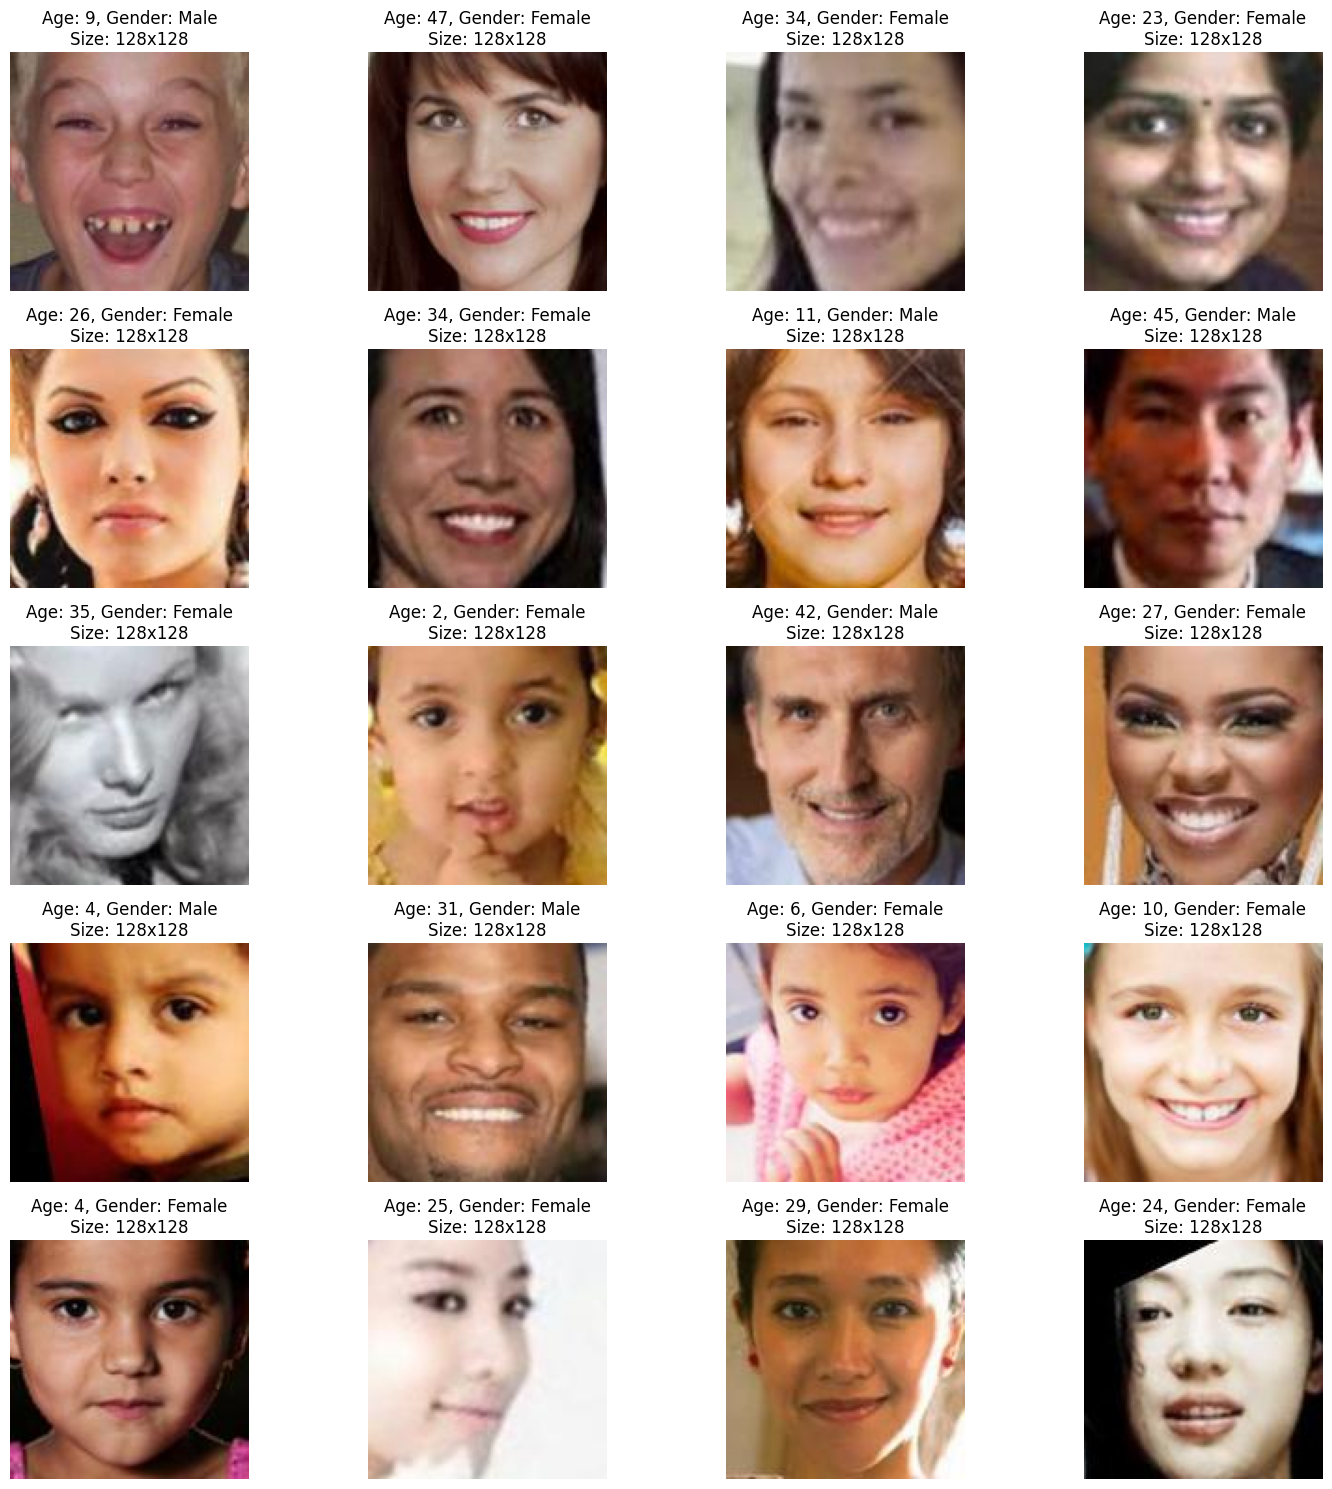

In [2]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the train_val folder within local directory
data_path = '/content/drive/MyDrive/train_val'

# Function to display images with metadata and size
def display_images_with_metadata(folder_path, num_images=20):
    # List of files in the folder
    files = os.listdir(folder_path)
    random.shuffle(files)
    # Filter out non-image files
    image_files = [f for f in files if f.endswith('.jpg') or f.endswith('.png')]

    # Display a few images along with their metadata
    fig, axes = plt.subplots(5, 4, figsize=(15, 15))
    axes = axes.ravel()

    ages = []
    genders = []

    for i, image_file in enumerate(image_files[:num_images]):
        # Load image
        image_path = os.path.join(folder_path, image_file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Get corresponding metadata (age and gender)
        metadata = image_file.split('_')
        age = metadata[0]
        gender = 'Male' if metadata[1] == '0' else 'Female'

        # Collect age and gender information
        ages.append(age)
        genders.append(gender)

        # Get image size
        height, width, _ = image.shape

        # Display image with metadata and size
        axes[i].imshow(image)
        axes[i].set_title(f'Age: {age}, Gender: {gender}\nSize: {height}x{width}')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Display images with metadata from the train_val folder
display_images_with_metadata(data_path)


## **Rearranging the Dataset**

To prepare the dataset for training and validation, the following steps were taken:

- **Metadata Extraction:** Parsed age and gender information from image filenames using the `extract_metadata` function.
- **Dataset Organization:** Collected image paths and labels into **DataFrames** for better management.
- **Data Splitting:** Divided the data into **training** and **validation** sets using an **80-20 split** with `train_test_split`, ensuring a balanced and representative split.
- **DataFrames Creation:** Combined image paths with their corresponding age and gender labels to create `traindf` and `valdf` for streamlined access during model training.

This setup ensures a well-structured dataset that is easy to feed into the training pipeline.


In [3]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
labels =[]

# Function to extract age and gender from filename
def extract_metadata(filename):
    metadata = filename.split('_')
    age = int(metadata[0])
    gender = int(metadata[1])
    labels.append([age, gender])
    return age, gender


# Function to organize dataset and save labels
def organize_dataset(data_path, test_size=0.2):
    image_paths = []
    labels = []
    files = os.listdir(data_path)
    image_files = [f for f in files if f.endswith('.jpg') or f.endswith('.png')]

    for image_file in image_files:
        # Extract metadata from filename
        age, gender = extract_metadata(image_file)

        # Append image path
        image_path = image_file
        image_paths.append(image_path)

        # Append gender and age labels
        labels.append([age, gender])
    image_paths_df=pd.DataFrame(image_paths,columns=['metadata'])
    labels_df=pd.DataFrame(labels, columns=['age', 'gender'])

    # Split dataset into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(
        image_paths_df, labels_df, test_size=test_size, random_state=42)
    traindf=pd.concat([X_train,y_train], axis=1)
    valdf=pd.concat([X_val,y_val], axis=1)
    return traindf, valdf

# Organize dataset
traindf, valdf = organize_dataset(data_path)
print(traindf)
print(valdf)

                                   metadata  age  gender
4227  59_0_0_20170111203905144.jpg.chip.jpg   59       0
4676  74_1_1_20170120223559844.jpg.chip.jpg   74       1
800   23_0_4_20170102233413972.jpg.chip.jpg   23       0
3671  49_0_0_20170104205331460.jpg.chip.jpg   49       0
4193  58_0_0_20170120224549744.jpg.chip.jpg   58       0
...                                     ...  ...     ...
4426  63_0_3_20170119211934680.jpg.chip.jpg   63       0
466    1_0_4_20161221195129503.jpg.chip.jpg    1       0
3092  38_1_0_20170109221205343.jpg.chip.jpg   38       1
3772  50_0_0_20170116232735637.jpg.chip.jpg   50       0
860   23_1_3_20170119164545181.jpg.chip.jpg   23       1

[4000 rows x 3 columns]
                                   metadata  age  gender
1501  26_1_1_20170112213024014.jpg.chip.jpg   26       1
2586  32_1_1_20170116175409630.jpg.chip.jpg   32       1
2653  34_0_0_20170117134919534.jpg.chip.jpg   34       0
1055  25_0_0_20170113210126947.jpg.chip.jpg   25       0
705   

## **Step 1: Data Pre-processing**

Before feeding images into the CNN model, the data underwent essential pre-processing steps:

### **1. Rescaling Pixel Values**
- Rescaled pixel values from **[0, 255]** to **[0, 1]** using `rescale=1./255`.
- Ensured consistent pre-processing between training and testing datasets, avoiding performance degradation.

### **2. Data Augmentation**
Applied augmentation techniques to enhance model generalization and reduce overfitting:
- **Rotation:** Up to **30°** to handle orientation variability.
- **Shifting:** Width and height shifts of **20%**, accommodating positional variations.
- **Shearing & Zooming:** Ranges set to **0.2**, enhancing model robustness to distortions and scale.
- **Brightness Adjustment:** Between **0.8 and 1.2** to manage lighting differences.
- **Horizontal Flip:** To introduce symmetry and variability.

### **Data Generators Setup**
- Created **train** and **validation generators** using `ImageDataGenerator`, enabling batch processing and shuffling of images.
- Configured for **multi-output** class mode, as both **age** and **gender** are predicted.

These pre-processing steps set a strong foundation for efficient and accurate model training.


In [4]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def preprocess_images(traindf, valdf, batch_size=32, target_size=(128, 128)):
    datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        brightness_range=[0.8, 1.2],
        horizontal_flip=True
    )

    # Generate augmented images along with their corresponding labels
    train_generator = datagen.flow_from_dataframe(
        dataframe=traindf,
        directory=data_path+'/',
        x_col="metadata",
        y_col=['age', 'gender'],
        color_mode='rgb',
        class_mode='multi_output',
        target_size=target_size,
        batch_size=batch_size,
        shuffle=True
    )
    val_generator = datagen.flow_from_dataframe(
        dataframe=valdf,
        directory=data_path+'/',
        x_col="metadata",
        y_col=['age', 'gender'],
        class_mode='multi_output',
        target_size=target_size,
        color_mode='rgb',
        batch_size=batch_size,
        shuffle=True
    )
    return train_generator, val_generator

train_gen, val_gen = preprocess_images(traindf, valdf)

Found 4000 validated image filenames.
Found 1000 validated image filenames.


## **Step 2A: Build Custom CNN Network**

### **Objective**
Design a **custom CNN model** with a **dual-output architecture** to perform:
1. **Gender Classification:** Binary output (0 or 1) using a sigmoid activation.
2. **Age Estimation:** Regression output using a ReLU activation.

### **Model Architecture and Constraints**

#### **1. Input Layer**
- Accepts images of size **128 x 128 x 3** to match the dataset dimensions and testing requirements.

#### **2. Convolutional Layers**
- **Four convolutional blocks** with increasing depth (**64, 128, 256, 512 filters**).
- Each block includes:
  - **Convolutional Layer:** `Conv2D` with **3x3** kernels and **ReLU activation**.
  - **Batch Normalization:** To stabilize training and improve convergence.
  - **Max Pooling:** **2x2** to reduce spatial dimensions while preserving features.

#### **3. Feature Map Reduction**
- The feature map size is reduced to **<10x10** before fully connected layers, adhering to the assignment's requirements.

#### **4. Fully Connected Layers**
- **Separate branches** for age and gender predictions:
  - **Dense Layers:** Two fully connected layers with **ReLU activation** for both branches.
  - **Dropout (0.1):** Prevents overfitting by randomly dropping **10%** of neurons during training.

#### **5. Output Layers**
- **Gender Output:** **1-unit** dense layer with **sigmoid activation** for binary classification.
- **Age Output:** **1-unit** dense layer with **ReLU activation** for non-negative age prediction.

### **Model Summary**
- The model is compiled using **Keras' Functional API** with a clear visualization of input, convolutional layers, and dual output branches.

### **Model Visualization**
- The architecture is visualized using **`plot_model`** to ensure the model structure aligns with design expectations.


In [5]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define input layer
input_layer = Input(shape=(128, 128, 3))

# Convolutional layers
conv_1 = Conv2D(64, kernel_size=(3, 3), activation='relu')(input_layer)
conv_1 = BatchNormalization()(conv_1)
max_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
conv_2 = Conv2D(128, kernel_size=(3, 3), activation='relu')(max_1)
conv_2 = BatchNormalization()(conv_2)
max_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
conv_3 = Conv2D(256, kernel_size=(3, 3), activation='relu')(max_2)
conv_3 = BatchNormalization()(conv_3)
max_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
conv_4 = Conv2D(512, kernel_size=(3, 3), activation='relu')(max_3)
conv_4 = BatchNormalization()(conv_4)
max_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)

flatten = Flatten()(max_4)

# fully connected layers
dense_gender = Dense(512, activation='relu')(flatten)
dense_age = Dense(512, activation='relu')(flatten)

dense_gender = Dense(1024, activation='relu')(dense_gender)
dense_age = Dense(1024, activation='relu')(dense_age)

dropout_gender = Dropout(0.1)(dense_gender)
dropout_age = Dropout(0.1)(dense_age)

output_gender = Dense(1, activation='sigmoid', name='gender_output')(dropout_gender)
output_age = Dense(1, activation='relu', name='age_output')(dropout_age)

# Define model
modelA = Model(inputs=input_layer, outputs=[ output_age, output_gender])

modelA.summary()
from tensorflow.keras.utils import plot_model
plot_model(modelA, show_shapes=True)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 126, 126, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 126, 126, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                             

## **Step 3A: Compile and Train the Model**

### **Objective**
Here, the model will be compiled and trained using the dataset prepared earlier. After training, the model will be saved with the filename **`age_gender_A.h5`** to ensure compatibility with the testing code.

### **Model Compilation**
- **Optimizer:** Adam optimizer with a **learning rate of 0.001**.
- **Loss Functions:**
  - **Mean Squared Error (MSE)** for age prediction (regression task).
  - **Binary Crossentropy** for gender classification (binary classification task).
- **Metrics:**
  - **Accuracy** for binary classification (gender).
  - **Mean Absolute Error (MAE)** for regression (age).

### **Callbacks**
- **EarlyStopping:** Monitors `val_loss`, with:
  - **Minimum Delta:** `0.01` (minimal change to count as an improvement).
  - **Patience:** `20` epochs to wait before stopping training if no improvement is found.
  - **Restore Best Weights:** Ensures the model returns to the best weights after early stopping.

### **Training the Model**
- **Training:** Using the `train_gen` and `val_gen` for the training and validation data generators.
- **Epochs:** Trained for **100 epochs** with **batch size of 32**.
- **Steps per Epoch:** Calculated as `train_gen.n // 32` (number of batches per epoch).
- **Validation Steps:** Similarly, `val_gen.n // 32`.

### **Model Saving**
- After training completes, the model is saved in the required directory with the **filename `age_gender_A.h5`**.

In [6]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, MeanSquaredError
from tensorflow.keras.metrics import BinaryAccuracy, MeanAbsoluteError

# Compile the model
modelA.compile(optimizer=Adam(learning_rate=0.001),
               loss= [ 'mse', 'binary_crossentropy'],
               metrics=[ 'accuracy', 'mae'])

es_callback = EarlyStopping(monitor='val_loss',min_delta=0.01,
                            patience=20,restore_best_weights=True)

history = modelA.fit(callbacks=[es_callback],
    x=train_gen,
    epochs=100, batch_size=32,
    steps_per_epoch=train_gen.n// 32,
    validation_data=val_gen,
    validation_steps=val_gen.n // 32,
)

# Save the model
modelA.save("/content/drive/MyDrive/Models/age_gender_A.h5")

Epoch 1/100
125/125 [==============================] - 24s 144ms/step - loss: 442.6870 - age_output_loss: 441.1837 - gender_output_loss: 1.5031 - age_output_accuracy: 0.0483 - age_output_mae: 16.0912 - gender_output_accuracy: 0.5775 - gender_output_mae: 0.4308 - val_loss: 418.2141 - val_age_output_loss: 417.5050 - val_gender_output_loss: 0.7091 - val_age_output_accuracy: 0.0484 - val_age_output_mae: 16.1643 - val_gender_output_accuracy: 0.5716 - val_gender_output_mae: 0.4764
Epoch 2/100
125/125 [==============================] - 19s 147ms/step - loss: 332.0453 - age_output_loss: 331.2771 - gender_output_loss: 0.7679 - age_output_accuracy: 0.0485 - age_output_mae: 14.1552 - gender_output_accuracy: 0.6255 - gender_output_mae: 0.4085 - val_loss: 407.5085 - val_age_output_loss: 406.8131 - val_gender_output_loss: 0.6953 - val_age_output_accuracy: 0.0484 - val_age_output_mae: 15.3417 - val_gender_output_accuracy: 0.5938 - val_gender_output_mae: 0.4584
Epoch 3/100
125/125 [===================

## **STEP4A: Draw the learning curves**

1.	The loss of the gender classification over the training and validation set
2.	The accuracy of the gender classification over the training and validation set
3.	The loss of the age estimation over the training and validation set
4.	The MAE of the age estimation over the training and validation set


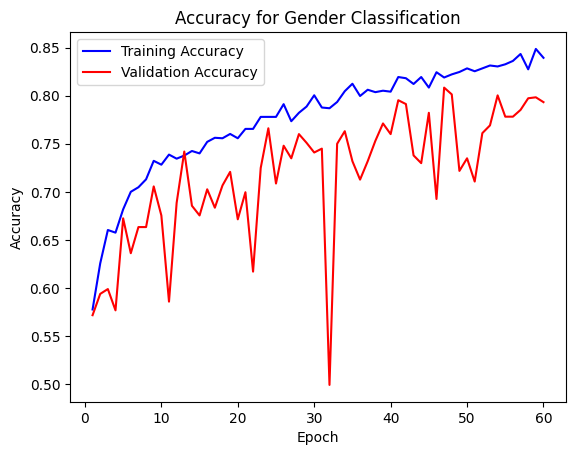

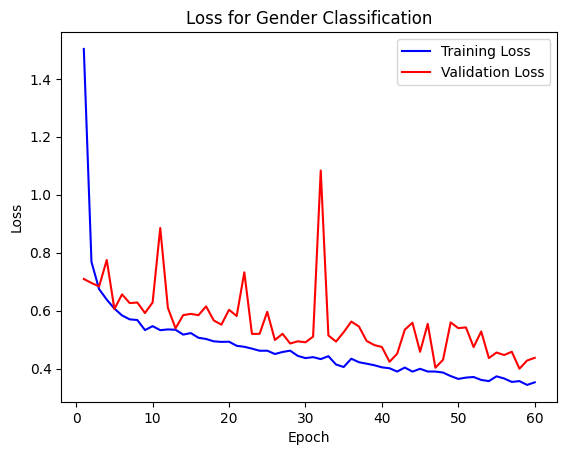

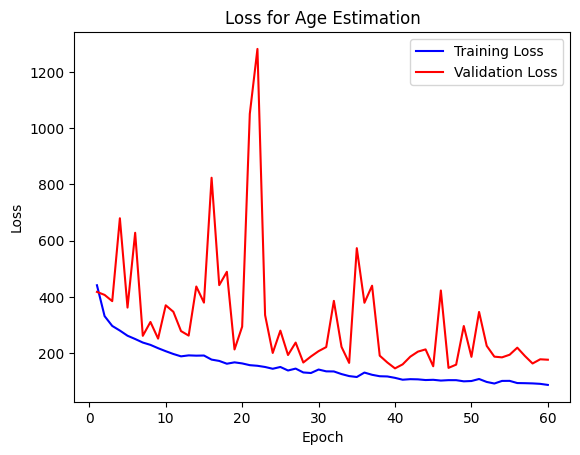

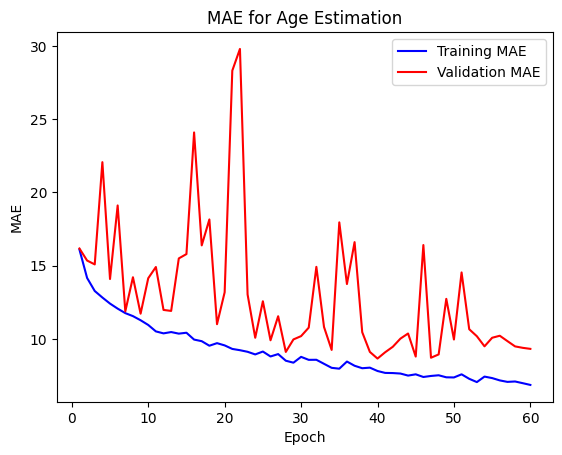

In [7]:
import matplotlib.pyplot as plt

# Plotting accuracy for gender classification
acc = history.history['gender_output_accuracy']
val_acc = history.history['val_gender_output_accuracy']
epochs = range(1, len(acc) + 1)  # Adjusted epochs range

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy for Gender Classification')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting loss for gender classification
loss = history.history['gender_output_loss']
val_loss = history.history['val_gender_output_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss for Gender Classification')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting loss for age estimation
loss_age = history.history['age_output_loss']
val_loss_age = history.history['val_age_output_loss']

plt.plot(epochs, loss_age, 'b', label='Training Loss')
plt.plot(epochs, val_loss_age, 'r', label='Validation Loss')
plt.title('Loss for Age Estimation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting MAE for age estimation
mae_age = history.history['age_output_mae']
val_mae_age = history.history['val_age_output_mae']

plt.plot(epochs, mae_age, 'b', label='Training MAE')
plt.plot(epochs, val_mae_age, 'r', label='Validation MAE')
plt.title('MAE for Age Estimation')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

## **Step 2A: Build a CNN Network Based on a Pre-Trained Model**

### **Objective**
Here, we are using a pre-trained CNN model (VGG16) and fine-tuning it to the specific dataset for gender classification and age prediction. This approach leverages the features learned by the VGG16 model on ImageNet to enhance performance on the new task. 

### **Model Architecture**
1. **Pre-trained Model (VGG16):** 
   - The VGG16 model is loaded with pre-trained weights from ImageNet and without the top layers (i.e., the classification layers).
   - The input shape is set to `(128, 128, 3)` as required, without resizing the input images.
  
2. **Custom Fully Connected Layers:**
   - **Age Output:** A Dense layer with 512 units followed by a dropout layer (to prevent overfitting), and a final output layer with a linear activation function for age prediction.
   - **Gender Output:** Similar fully connected layers for gender classification, but the output layer uses a sigmoid activation function to perform binary classification.
  
3. **Freezing Layers:**
   - The layers of the VGG16 model are frozen during training to prevent them from being updated. This allows us to use the learned features from ImageNet and only train the new layers we have added for the specific tasks.

### **Model Summary**
After defining the model, we can check its architecture using `modelB.summary()` and visualize it using `plot_model()`.

In [12]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout


# Load the pre-trained VGG16 model without including the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))


# Add custom fully connected layers for gender classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.1)(x)
age_output = Dense(1, activation='linear', name='age_output')(x)


# Add custom fully connected layers for age estimation
y = base_model.output
y = GlobalAveragePooling2D()(y)
y = Dense(512, activation='relu')(y)
y = Dropout(0.1)(y)
gender_output = Dense(1, activation='sigmoid', name='gender_output')(y)


# Define the model
modelB = Model(inputs=base_model.input, outputs=[age_output, gender_output])


# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False


modelB.summary()
from tensorflow.keras.utils import plot_model
plot_model(modelB, show_shapes=True)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 128, 128, 64  1792        ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 128, 128, 64  36928       ['block1_conv1[0][0]']           
                                )                                                           

## **STEP3B: Compile and train the model**
Compiled and trained the model here. 
Saved the model to `age_gender_B.h5` after training. 

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

# Compile the model
modelB.compile(optimizer=Adam(learning_rate=0.001),  loss= [ 'mse', 'binary_crossentropy'],
               metrics=[ 'accuracy', 'mae'])

es_callback = EarlyStopping(monitor='val_loss',min_delta=0.01,
                            patience=5,restore_best_weights=True)
# Train the model with adjusted steps per epoch and validation steps
history = modelB.fit(x=train_gen,
                     validation_data=val_gen,
                     callbacks=[es_callback],
                     epochs=50,
                     batch_size= 32,
                     steps_per_epoch=train_gen.n// 32,
                     validation_steps=val_gen.n // 32
                     )

# Save the model
modelB.save("/content/drive/MyDrive/Models/age_gender_B.h5"))

Epoch 1/50
125/125 [==============================] - 18s 136ms/step - loss: 455.6945 - age_output_loss: 455.0951 - gender_output_loss: 0.5993 - age_output_accuracy: 0.0485 - age_output_mae: 16.3173 - gender_output_accuracy: 0.6758 - gender_output_mae: 0.4200 - val_loss: 335.8429 - val_age_output_loss: 335.3173 - val_gender_output_loss: 0.5256 - val_age_output_accuracy: 0.0474 - val_age_output_mae: 14.2055 - val_gender_output_accuracy: 0.7490 - val_gender_output_mae: 0.3682
Epoch 2/50
125/125 [==============================] - 18s 141ms/step - loss: 285.8631 - age_output_loss: 285.3213 - gender_output_loss: 0.5418 - age_output_accuracy: 0.0485 - age_output_mae: 13.1082 - gender_output_accuracy: 0.7240 - gender_output_mae: 0.3680 - val_loss: 267.7296 - val_age_output_loss: 267.1924 - val_gender_output_loss: 0.5372 - val_age_output_accuracy: 0.0484 - val_age_output_mae: 12.7700 - val_gender_output_accuracy: 0.7308 - val_gender_output_mae: 0.3691
Epoch 3/50
125/125 [======================

## **STEP4B: Draw the learning curve**
Draw four figures as follows
1.	The loss of the gender classification over the training and validation set
2.	The accuracy of the gender classification over the training and validation set
3.	The loss of the age estimation over the training and validation set
4.	The MAE of the age estimation over the training and validation set

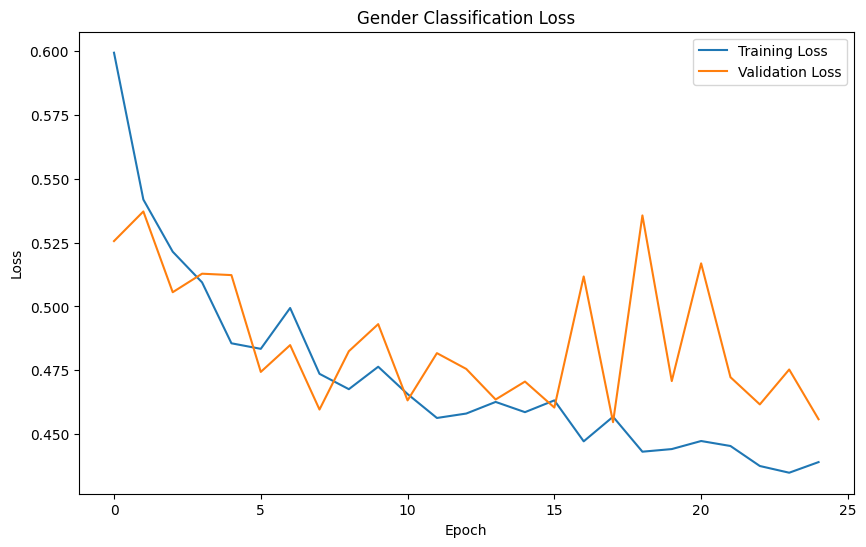

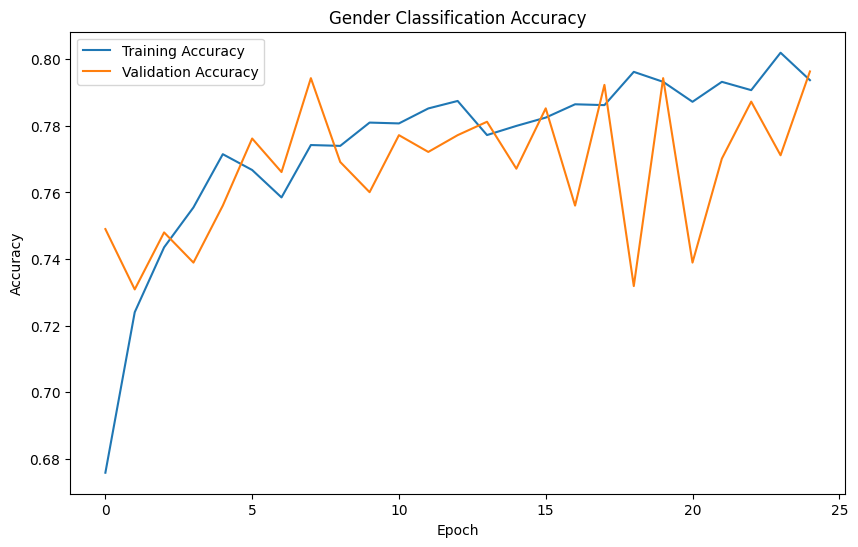

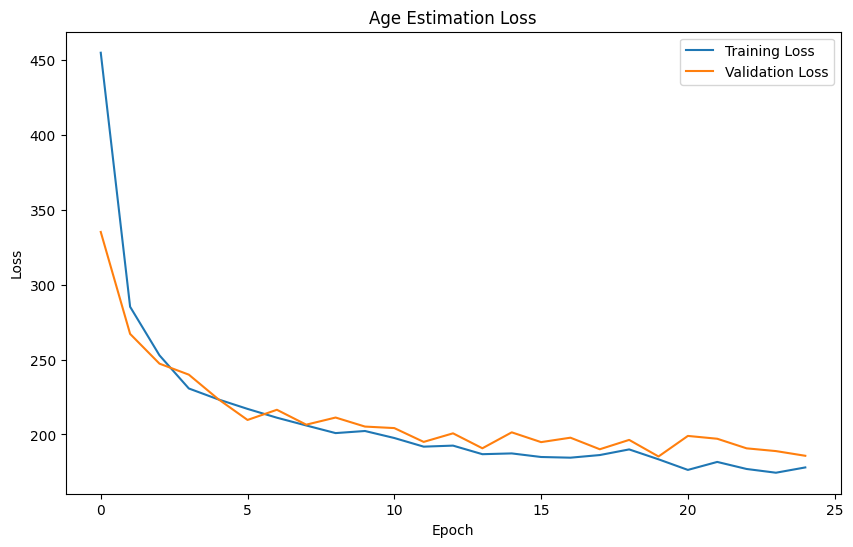

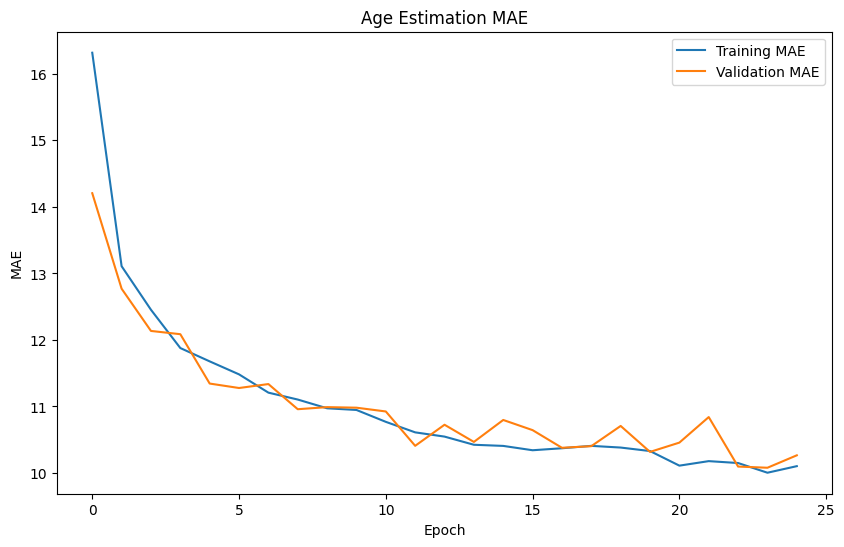

In [14]:
import matplotlib.pyplot as plt

# Plotting loss of gender classification
plt.figure(figsize=(10, 6))
plt.plot(history.history['gender_output_loss'], label='Training Loss')
plt.plot(history.history['val_gender_output_loss'], label='Validation Loss')
plt.title('Gender Classification Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting accuracy of gender classification
plt.figure(figsize=(10, 6))
plt.plot(history.history['gender_output_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_gender_output_accuracy'], label='Validation Accuracy')
plt.title('Gender Classification Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting loss of age estimation
plt.figure(figsize=(10, 6))
plt.plot(history.history['age_output_loss'], label='Training Loss')
plt.plot(history.history['val_age_output_loss'], label='Validation Loss')
plt.title('Age Estimation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting MAE of age estimation
plt.figure(figsize=(10, 6))
plt.plot(history.history['age_output_mae'], label='Training MAE')
plt.plot(history.history['val_age_output_mae'], label='Validation MAE')
plt.title('Age Estimation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()